# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [20]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720710348014e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [21]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [71]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 4.447687e-11
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738421e-09
W1 max relative error: 3.561318e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.06201320188607024


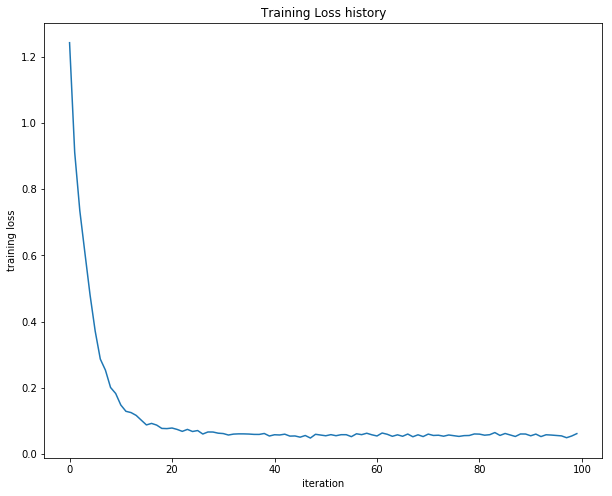

In [72]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [73]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [181]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
print(net.predict(X_val))
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302994
iteration 100 / 1000: loss 2.302637
iteration 200 / 1000: loss 2.299758
iteration 300 / 1000: loss 2.269658
iteration 400 / 1000: loss 2.204021
iteration 500 / 1000: loss 2.122177
iteration 600 / 1000: loss 2.033966
iteration 700 / 1000: loss 2.048295
iteration 800 / 1000: loss 1.997814
iteration 900 / 1000: loss 1.913859
[8 7 8 6 1 6 0 0 5 5 4 9 9 0 7 5 4 6 0 6 1 9 6 1 0 8 9 6 5 8 6 9 5 5 5 9 8
 6 6 5 9 6 9 8 6 9 6 0 5 6 1 5 5 0 0 6 5 9 9 1 0 6 9 9 9 9 9 0 5 4 6 9 9 6
 4 8 6 6 4 8 6 5 9 5 8 8 8 8 8 4 8 0 9 0 6 6 8 6 5 4 0 9 0 6 6 6 5 0 0 6 6
 5 9 5 5 9 5 1 7 6 5 5 9 9 8 9 0 8 8 6 8 6 9 8 8 6 4 8 5 7 4 6 6 9 5 5 7 6
 9 0 9 0 0 0 0 8 4 1 8 6 8 0 9 9 8 7 8 8 8 0 9 5 6 0 0 8 9 8 8 5 9 9 9 9 8
 0 9 4 5 0 6 8 5 8 8 0 0 0 5 0 6 0 8 4 1 0 9 6 9 1 5 9 6 6 1 5 5 9 2 0 8 9
 0 1 6 9 6 6 9 5 9 4 5 5 1 8 8 5 8 1 5 5 5 6 6 0 8 8 4 9 8 6 6 0 9 0 4 8 9
 5 6 6 9 5 7 9 9 5 8 1 4 5 5 0 8 5 0 6 9 8 1 9 6 6 9 6 7 9 5 6 4 0 6 6 4 9
 9 6 5 5 6 5 9 9 5 6 8 5 8 6 5 6 6 6 5 6 0

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

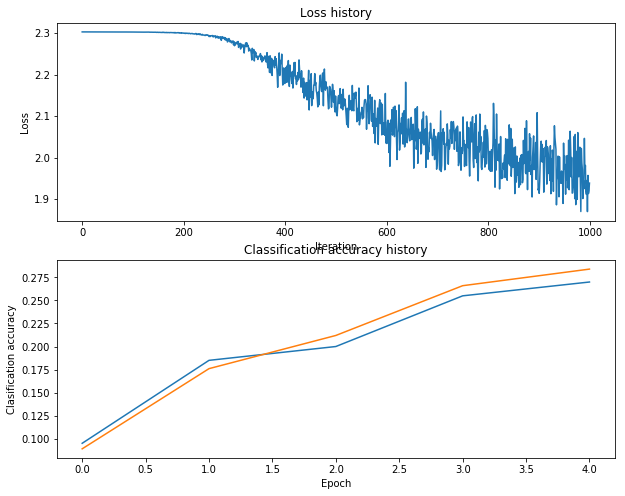

In [182]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

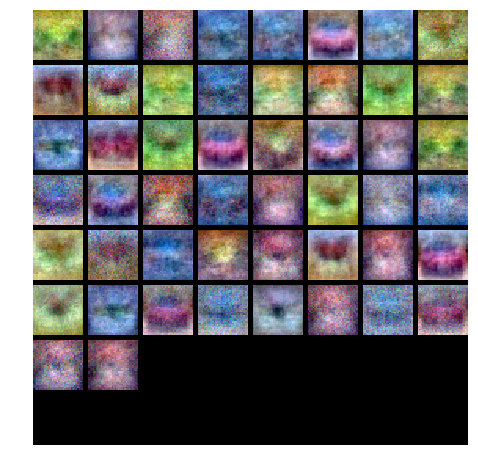

In [88]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [193]:
def net_with_params(hidden_size=3000, batch_size=1000, learning_rate=0.01, 
                    reg=0.05, epochs=1000, learning_rate_decay=0.95, verbose=False):
    net = TwoLayerNet(32 * 32 * 3, hidden_size, 10)

    # Train the network
    stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=epochs*(X_train.shape[0]//batch_size), batch_size=batch_size,
                learning_rate=learning_rate, learning_rate_decay=learning_rate_decay,
                reg=reg, verbose=verbose)
    return net, net.loss(X_train, y_train)[0], net.loss(X_val, y_val)[0]

In [197]:
hidden_size_l = np.linspace(30, 3000, 20, dtype=int)
batch_size_l = np.linspace(20, 2000, 20, dtype=int)
learning_rate_l = np.arange(1e-4, 2e-2, 1e-3)
reg_l = np.arange(0.05, 0.8, 0.05)
learning_rate_decay = np.arange(0.8, 0.95, 0.05)

In [195]:
learning_rate_l = 10**(-np.arange(2, 5, 0.2))

In [112]:
import pandas as pd

In [166]:
learning_rate_l

array([1.00000000e-03, 6.30957344e-04, 3.98107171e-04, 2.51188643e-04,
       1.58489319e-04, 1.00000000e-04, 6.30957344e-05, 3.98107171e-05,
       2.51188643e-05, 1.58489319e-05])

In [200]:
losses_for_hidden_0 = {'hidden_size': [], 'train_loss': [], 'val_loss': []}
for one_hidden_size in tqdm_notebook(hidden_size_l):
    net_, t, v = net_with_params(learning_rate=0.001, epochs=5, hidden_size=500, reg=0.35, batch_size=100, learning_rate_decay=0.9)
    print((net_.predict(X_val) == y_val).mean())
    print(one_hidden_size, t, v)

A Jupyter Widget

Exception in thread Thread-40:
Traceback (most recent call last):
  File "/Users/mart/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/mart/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/mart/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



0.46
30 1.4659611217271775 1.5140350018374762
0.499
186 1.3291472677925502 1.4146313028376634
0.487
342 1.3552974421613133 1.4434559036727215
0.499
498 1.3426502601389627 1.4369642383416035
0.485
655 1.325425066718456 1.435728429963791



KeyboardInterrupt: 

A Jupyter Widget

0.0001 2.3025304456069486 2.3025280823549257
0.0011 2.2946852098801647 2.2945268718579857
0.0021 2.1799522603400185 2.176803865621506
0.0031 2.074170221316973 2.0705827828782937
0.0041 2.0051858769344886 2.0045531629641733
0.0051 1.936380761425725 1.9431225669859855
0.0061 1.9129402927505115 1.9155000720301545
0.0071 1.8670218466970132 1.8694850048189242
0.0081 1.8328738922710401 1.8358535437851498
0.0091 1.8068708263024331 1.811194531654596
0.0101 1.792004928023009 1.8051048710845121


/Users/mart/projects/cs321n/assignment1/cs231n/classifiers/neural_net.py:86: RuntimeWarning: overflow encountered in exp
  exp_sc = np.exp(scores)
/Users/mart/projects/cs321n/assignment1/cs231n/classifiers/neural_net.py:97: RuntimeWarning: invalid value encountered in true_divide
  dq = np.ones_like(scores) * exp_sc / scpum[:, None]
/Users/mart/projects/cs321n/assignment1/cs231n/classifiers/neural_net.py:106: RuntimeWarning: invalid value encountered in less
  dh[np.where(X @ W1 + b1 < 0)] = 0


0.011099999999999999 nan nan
0.0121 nan nan
0.0131 nan nan
0.0141 nan nan
0.015099999999999999 nan nan
0.0161 nan nan
0.0171 nan nan
0.0181 nan nan
0.0191 nan nan
0.0201 nan nan
0.0211 nan nan
0.022099999999999998 nan nan
0.0231 nan nan
0.0241 nan nan
0.0251 nan nan
0.0261 nan nan
0.0271 nan nan
0.0281 nan nan
0.0291 nan nan
0.0301 nan nan
0.0311 nan nan
0.032100000000000004 nan nan
0.033100000000000004 nan nan
0.034100000000000005 nan nan
0.035100000000000006 nan nan
0.03610000000000001 nan nan
0.0371 nan nan
0.0381 nan nan
0.0391 nan nan
0.040100000000000004 nan nan
0.041100000000000005 nan nan
0.042100000000000005 nan nan
0.043100000000000006 nan nan
0.0441 nan nan
0.0451 nan nan
0.0461 nan nan
0.0471 nan nan
0.048100000000000004 nan nan
0.049100000000000005 nan nan
0.050100000000000006 nan nan
0.051100000000000007 nan nan
0.05210000000000001 nan nan
0.0531 nan nan
0.0541 nan nan
0.0551 nan nan
0.056100000000000004 nan nan
0.057100000000000005 nan nan
0.058100000000000006 nan nan
0.

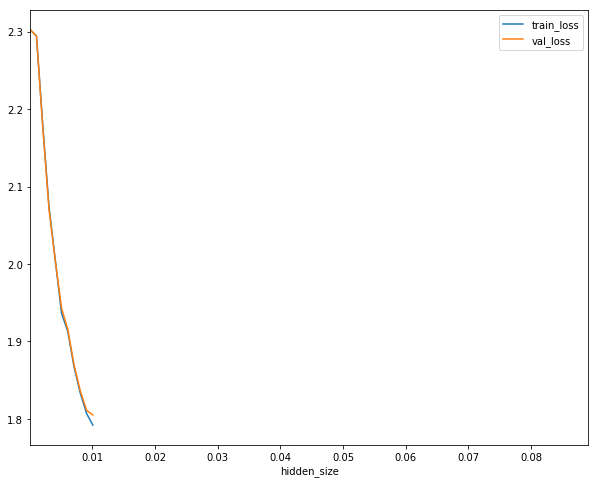

In [131]:
losses_for_hidden_0 = {'hidden_size': [], 'train_loss': [], 'val_loss': []}
for one_hidden_size in tqdm_notebook(learning_rate_l):
    _, t, v = net_with_params(learning_rate=one_hidden_size)
    losses_for_hidden_0['hidden_size'].append(one_hidden_size)
    losses_for_hidden_0['train_loss'].append(t)
    losses_for_hidden_0['val_loss'].append(v)
    print(one_hidden_size, t, v)
pd.DataFrame(losses_for_hidden_0).set_index('hidden_size').plot()

In [158]:
net_, t, v = net_with_params(verbose=True, epochs=3000)

iteration 0 / 3000: loss 2.307006
iteration 100 / 3000: loss 1.692653
iteration 200 / 3000: loss 1.705107
iteration 300 / 3000: loss 1.648764
iteration 400 / 3000: loss 1.719910
iteration 500 / 3000: loss 1.720110
iteration 600 / 3000: loss 1.639246
iteration 700 / 3000: loss 1.709101
iteration 800 / 3000: loss 1.731221
iteration 900 / 3000: loss 1.690109
iteration 1000 / 3000: loss 1.692299
iteration 1100 / 3000: loss 1.703788
iteration 1200 / 3000: loss 1.713155
iteration 1300 / 3000: loss 1.733630
iteration 1400 / 3000: loss 1.675112
iteration 1500 / 3000: loss 1.720332
iteration 1600 / 3000: loss 1.718896
iteration 1700 / 3000: loss 1.681624
iteration 1800 / 3000: loss 1.707520
iteration 1900 / 3000: loss 1.713693
iteration 2000 / 3000: loss 1.670703
iteration 2100 / 3000: loss 1.733925
iteration 2200 / 3000: loss 1.683868
iteration 2300 / 3000: loss 1.663147
iteration 2400 / 3000: loss 1.677781
iteration 2500 / 3000: loss 1.676486
iteration 2600 / 3000: loss 1.691540
iteration 270

In [96]:
best_net = None # store the best model into this 

best_acc = 0

hidden_size_l = np.linspace(30, 300, 4, dtype=int)
batch_size_l = np.linspace(20, 2000, 4, dtype=int)
learning_rate_l = np.arange(1e-3, 1e-1, 1e-2)
reg_l = np.arange(0.05, 0.25, 0.05)

best_params = None

from itertools import product
from tqdm import tqdm_notebook

variantes = list(product(hidden_size_l, batch_size_l, learning_rate_l, reg_l))

for hidden_size, batch_size, learning_rate, reg in tqdm_notebook(variantes):
    
    net_with_params(hidden_size, batch_size, learning_rate, reg, 100)
    
    # Predict on the validation set
    val_acc = (net.predict(X_val) == y_val).mean()
    
    if val_acc > best_acc:
        best_acc = val_acc
        best_net = net
        best_params = (hidden_size, batch_size, learning_rate, reg)
    print('Current best val_acc: '+str(best_acc), end='\r')

A Jupyter Widget

/Users/mart/projects/cs321n/assignment1/cs231n/classifiers/neural_net.py:86: RuntimeWarning: overflow encountered in exp
  exp_sc = np.exp(scores)
/Users/mart/projects/cs321n/assignment1/cs231n/classifiers/neural_net.py:97: RuntimeWarning: invalid value encountered in true_divide
  dq = np.ones_like(scores) * exp_sc / scpum[:, None]
/Users/mart/projects/cs321n/assignment1/cs231n/classifiers/neural_net.py:106: RuntimeWarning: invalid value encountered in less
  dh[np.where(X @ W1 + b1 < 0)] = 0


/Users/mart/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Current best val_acc: 0.393


In [205]:
bn = net_with_params(learning_rate=0.001, epochs=50, hidden_size=500, 
                     reg=0.35, batch_size=100, learning_rate_decay=0.9, 
                     verbose=True)

iteration 0 / 24500: loss 2.307932
iteration 100 / 24500: loss 1.834419
iteration 200 / 24500: loss 1.838064
iteration 300 / 24500: loss 1.675390
iteration 400 / 24500: loss 1.633426
iteration 500 / 24500: loss 1.552105
iteration 600 / 24500: loss 1.621914
iteration 700 / 24500: loss 1.612042
iteration 800 / 24500: loss 1.506750
iteration 900 / 24500: loss 1.347538
iteration 1000 / 24500: loss 1.521323
iteration 1100 / 24500: loss 1.643791
iteration 1200 / 24500: loss 1.667000
iteration 1300 / 24500: loss 1.522001
iteration 1400 / 24500: loss 1.398304
iteration 1500 / 24500: loss 1.483179
iteration 1600 / 24500: loss 1.315668
iteration 1700 / 24500: loss 1.572930
iteration 1800 / 24500: loss 1.459037
iteration 1900 / 24500: loss 1.268388
iteration 2000 / 24500: loss 1.446617
iteration 2100 / 24500: loss 1.285524
iteration 2200 / 24500: loss 1.476472
iteration 2300 / 24500: loss 1.432976
iteration 2400 / 24500: loss 1.499197
iteration 2500 / 24500: loss 1.539862
iteration 2600 / 24500: 

iteration 21300 / 24500: loss 1.191651
iteration 21400 / 24500: loss 1.218063
iteration 21500 / 24500: loss 1.298994
iteration 21600 / 24500: loss 1.340465
iteration 21700 / 24500: loss 1.312726
iteration 21800 / 24500: loss 1.317835
iteration 21900 / 24500: loss 1.341931
iteration 22000 / 24500: loss 1.223430
iteration 22100 / 24500: loss 1.364396
iteration 22200 / 24500: loss 1.266803
iteration 22300 / 24500: loss 1.185232
iteration 22400 / 24500: loss 1.479380
iteration 22500 / 24500: loss 1.259330
iteration 22600 / 24500: loss 1.163381
iteration 22700 / 24500: loss 1.197098
iteration 22800 / 24500: loss 1.209575
iteration 22900 / 24500: loss 1.214628
iteration 23000 / 24500: loss 1.238784
iteration 23100 / 24500: loss 1.249566
iteration 23200 / 24500: loss 1.277109
iteration 23300 / 24500: loss 1.316465
iteration 23400 / 24500: loss 1.216202
iteration 23500 / 24500: loss 1.169876
iteration 23600 / 24500: loss 1.269809
iteration 23700 / 24500: loss 1.236638
iteration 23800 / 24500: 

In [212]:
bn = net_with_params(learning_rate=0.001, epochs=20, hidden_size=500, 
                     reg=0.35, batch_size=100, learning_rate_decay=0.9, 
                     verbose=True)

iteration 0 / 9800: loss 2.307948
iteration 100 / 9800: loss 1.925893
iteration 200 / 9800: loss 1.764343
iteration 300 / 9800: loss 1.808391
iteration 400 / 9800: loss 1.661715
iteration 500 / 9800: loss 1.584691
iteration 600 / 9800: loss 1.469447
iteration 700 / 9800: loss 1.503657
iteration 800 / 9800: loss 1.545514
iteration 900 / 9800: loss 1.553408
iteration 1000 / 9800: loss 1.743991
iteration 1100 / 9800: loss 1.513151
iteration 1200 / 9800: loss 1.689638
iteration 1300 / 9800: loss 1.564158
iteration 1400 / 9800: loss 1.588393
iteration 1500 / 9800: loss 1.435697
iteration 1600 / 9800: loss 1.525249
iteration 1700 / 9800: loss 1.571342
iteration 1800 / 9800: loss 1.389293
iteration 1900 / 9800: loss 1.267505
iteration 2000 / 9800: loss 1.734433
iteration 2100 / 9800: loss 1.315579
iteration 2200 / 9800: loss 1.500623
iteration 2300 / 9800: loss 1.607418
iteration 2400 / 9800: loss 1.487814
iteration 2500 / 9800: loss 1.484822
iteration 2600 / 9800: loss 1.312115
iteration 270

In [207]:
(bn[0].predict(X_val) == y_val).mean()

0.559

So right now I surely have 4 extra points.

My next targets are:

- code for momentum and test it works
- try out something weird maybe

But not concentrate on fine-tuning at all

In [ ]:
np.log()

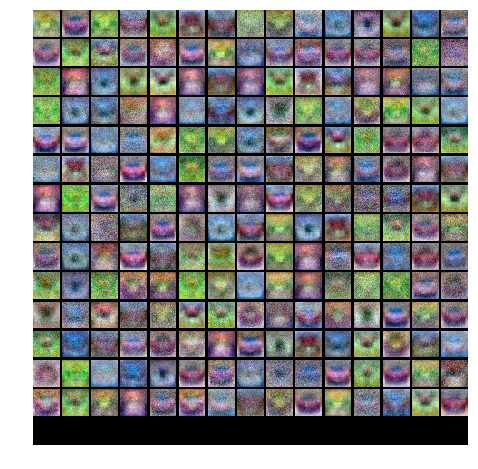

In [208]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [210]:
test_acc = (bn[0].predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.562
